Act as a data scientist given only this one-line instruction: **Predict the canada per capita income for the next 5 years, starting 2024.**

Perform the necessary steps you think you must perform.

Import libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

Load the data

In [13]:
data = pd.read_csv('canada_per_capita_income.csv')

Print data

In [16]:
data

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


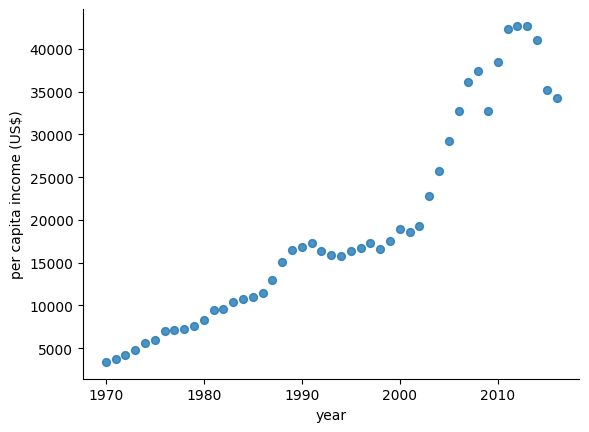

In [15]:
# @title year vs per capita income (US$)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='year', y='per capita income (US$)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

There are no missing or zero values so it is a clean csv to begin with. There is no need to data clean at this point.

We will use linear regression as there are two columns: year and per capita income(US$). Here we can attempt to represent the independent variable on the X which is year, and the dependent variable/numeric outcome on the Y.

The algorithm assumes a strong linear relationship between input and output variables in a linear way.

Prepare data (features and target variable)

In [17]:
X = data[['year']]  # features
X

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


In [18]:
y = data['per capita income (US$)']  # target variable
y

0      3399.299037
1      3768.297935
2      4251.175484
3      4804.463248
4      5576.514583
5      5998.144346
6      7062.131392
7      7100.126170
8      7247.967035
9      7602.912681
10     8355.968120
11     9434.390652
12     9619.438377
13    10416.536590
14    10790.328720
15    11018.955850
16    11482.891530
17    12974.806620
18    15080.283450
19    16426.725480
20    16838.673200
21    17266.097690
22    16412.083090
23    15875.586730
24    15755.820270
25    16369.317250
26    16699.826680
27    17310.757750
28    16622.671870
29    17581.024140
30    18987.382410
31    18601.397240
32    19232.175560
33    22739.426280
34    25719.147150
35    29198.055690
36    32738.262900
37    36144.481220
38    37446.486090
39    32755.176820
40    38420.522890
41    42334.711210
42    42665.255970
43    42676.468370
44    41039.893600
45    35175.188980
46    34229.193630
Name: per capita income (US$), dtype: float64

Choose a model

In [9]:
model = LinearRegression()

Train the model

In [10]:
model.fit(X, y)

LinearRegression()

Make predictions for the next 5 years

In [22]:
future_years = pd.DataFrame({'year': [2024, 2025, 2026, 2027, 2028]})
future_years


,year
0,2024
1,2025
2,2026
3,2027
4,2028


In [23]:
predicted_incomes = model.predict(future_years)
predicted_incomes

array([44602.55439531, 45431.01947053, 46259.48454575, 47087.94962098,
       47916.4146962 ])

Print predictions

We will use zip which is a python feature. future_years['year'] is a list or array-like structure containing the future years to be predicted. predited_incomes is a list/array containing the predicted per capita incomes corresponding to each year in future_years['years']. zip(future_years['year'], predicted_incomes) pairs each year with its corresponding predicted income. Inside the for loop {year} and {income:.2f} are placeholders in the string for the output. {income:.2f} formats income as a float with 2 decimal points.

In [24]:
for year, income in zip(future_years['year'], predicted_incomes):
    print(f"Predicted per capita income for {year}: ${income:.2f}")

Predicted per capita income for 2024: $44602.55
Predicted per capita income for 2025: $45431.02
Predicted per capita income for 2026: $46259.48
Predicted per capita income for 2027: $47087.95
Predicted per capita income for 2028: $47916.41


Visualize predictions

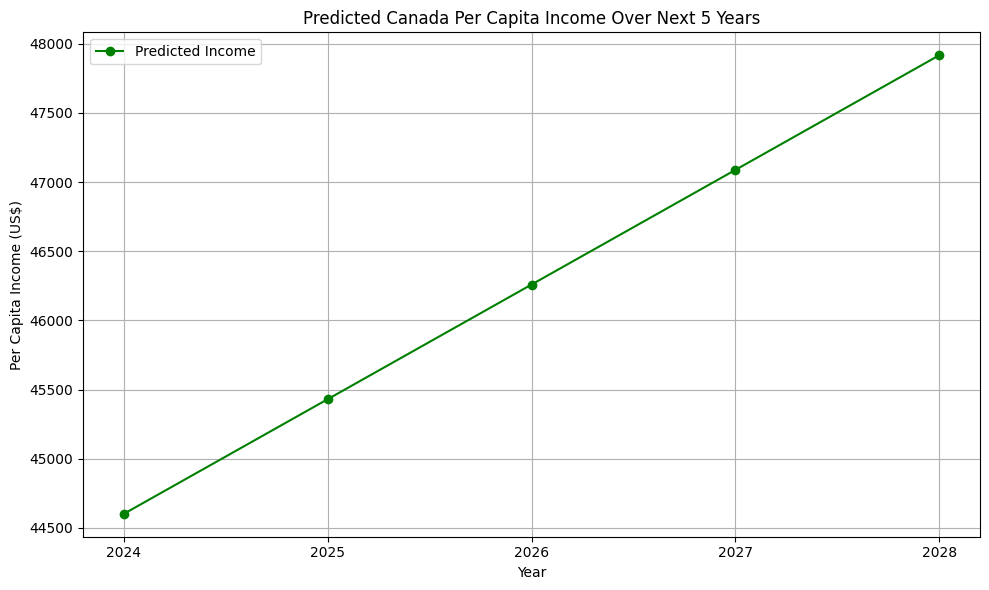

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(future_years['year'], predicted_incomes, marker='o', linestyle='-', color='g', label='Predicted Income')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Predicted Canada Per Capita Income Over Next 5 Years')

plt.xticks(future_years['year'])  # Set the x-axis ticks to match the years exactly

# Adding grid lines
plt.grid(True)
plt.legend()

# Showing plot
plt.tight_layout()
plt.show()